# Two dimensions discrepancy model

In [1]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline
%reload_ext autoreload

In [2]:
space_size = 10
#space = np.array(np.random.sample((space_size, space_size)) > 0.01, dtype=int)
space = np.ones((space_size, space_size))
space

array([[ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.]])

In [3]:
space[3-2:3+2, 5-2:5+2] = 0
space

array([[ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  0.,  0.,  0.,  0.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  0.,  0.,  0.,  0.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  0.,  0.,  0.,  0.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  0.,  0.,  0.,  0.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.]])

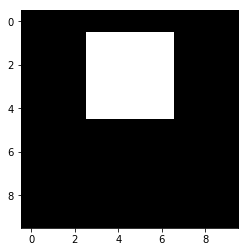

In [4]:
plt.imshow(space, cmap='binary');

In [38]:
class Drop():
    """A drop at given position x, y and size r (radius)."""
    def __init__(self, x, y, r):
        self.x = x
        self.y = y
        self.r = r
    
class Space():
    """A square space of given size."""
    def __init__(self, size):
        self.size = size
        self.array = np.ones((size, size))
        
class SquareDensity():
    """Square uniform density for given drops in given space.
    
    Parameters:
    -----------
    space : Space
        the space where to define the density
    drops : iterable of Drop.
    
    """
    def __init__(self, space, drops):
        self.drops = drops
        self.density = self.make_density(space, drops)
        
    def make_density(self, space, drops):
        density = space.array.copy()
        for drop in drops:
            # boundaries
            bx1 = max(0, drop.x - drop.r)
            bx2 = min(space.size, drop.x + drop.r)
            by1 = max(0, drop.y - drop.r)
            by2 = min(space.size, drop.y + drop.r)
            density[bx1:bx2+1, by1:by2+1] = 0
        return density
    
    def plot(self):
        plt.imshow(self.density, cmap='gray')
        xsys = np.array([(drop.x, drop.y) for drop in self.drops])
        xs, ys = xsys[:, 0], xsys[:, 1]
        plt.scatter(y=xs, x=ys, color='red', marker = '.');
            

In [30]:
arr = np.array([(1,2), (3,4)])
arr

array([[1, 2],
       [3, 4]])

In [32]:
arr[:,1]

array([2, 4])

In [39]:
sp = Space(100)
dr1 = Drop(3, 5, 2)
dr2 = Drop(34, 88, 3)
dr3 = Drop(80, 20, 10)

In [40]:
de = SquareDensity(sp, [dr1, dr2, dr3])

In [41]:
de.density

array([[ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [ 1.,  1.,  1., ...,  1.,  1.,  1.],
       ..., 
       [ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [ 1.,  1.,  1., ...,  1.,  1.,  1.]])

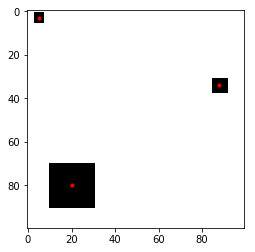

In [42]:
de.plot()

### Rain

In [26]:
space.array

array([[ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.]])

In [84]:
def discrete_rejection_sampling(row_vec, max_try=10):
    """Return a random int strictly lower than len(`row_vec`) given a (unnormalized) density vector `row_vec`.
    
    Assumption: values in `row_vec` are in [0, 1]
    
    Parameters
    ----------
    row_vec : iterable
        float values in [0, 1]
    
    max_try : int
        max number of tries
        
    Returns
    -------
    out : int or None
        the index of `row_vec` sampled according to its probability values or None if max_try is reached.
    
    """
    #print("max_try=", max_try)
    if max_try == 0:
        return None
    u = np.random.randint(low=len(row_vec))
    v = np.random.sample()
    if v < row_vec[u]:
        return u
    else:
        return discrete_rejection_sampling(row_vec, max_try - 1)

In [98]:
def sample_square_drop(space, drops, max_try=10):
    if max_try == 0:
        return None
    sq_dens = SquareDensity(space, drops)
    row_idx = np.random.randint(low=size)
    row = sq_dens.density[row_idx, :]
    col_idx = discrete_rejection_sampling(row)
    if col_idx is not None:
        return (row_idx, col_idx)
    else:
        return sample_square_drop(space, drops, max_try=max_try - 1)

In [99]:
size = 10
space = Space(size)
drops = [Drop(5,5,2)]

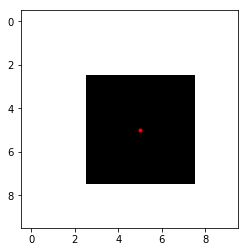

In [100]:
sq_dens = SquareDensity(space, drops)


In [102]:
new_drop = sample_square_drop(space, drops)

(2, 3)

In [ ]:
sq_dens.plot()
